
# Old Car Price Prediction 
# Phase 1

Phase 1:- Import dataset in CSV file and Cleaning datasets

In [1]:
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

In [3]:
data_sets = pd.read_csv("train-data.csv")
data_test = pd.read_csv("test-data.csv")

In [4]:
dt =data_test.dropna()

In [5]:
data_test.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [6]:
df =data_sets.drop(["Unnamed: 0", "New_Price"] , axis=1)
dtf =data_test.drop(["Unnamed: 0", "New_Price"] , axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [8]:
df["Fuel_Type"].value_counts()

Fuel_Type
Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: count, dtype: int64

In [9]:
df["Owner_Type"].value_counts()

Owner_Type
First             4929
Second             968
Third              113
Fourth & Above       9
Name: count, dtype: int64

In [10]:
df["Seats"].value_counts()

Seats
5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: count, dtype: int64

In [11]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [12]:
print(list(np.where(df["Seats"] == 0.0)))

[array([3999], dtype=int64)]


In [13]:
df.iloc[3999]

Name                 Audi A4 3.2 FSI Tiptronic Quattro
Location                                     Hyderabad
Year                                              2012
Kilometers_Driven                               125000
Fuel_Type                                       Petrol
Transmission                                 Automatic
Owner_Type                                       First
Mileage                                      10.5 kmpl
Engine                                         3197 CC
Power                                         null bhp
Seats                                              0.0
Price                                             18.0
Name: 3999, dtype: object

In [14]:
df =df.drop([3999])

In [15]:
df.iloc[3999]

Name                 Ford Figo Diesel EXI
Location                          Kolkata
Year                                 2011
Kilometers_Driven                   37000
Fuel_Type                          Diesel
Transmission                       Manual
Owner_Type                          First
Mileage                         20.0 kmpl
Engine                            1399 CC
Power                           68.05 bhp
Seats                                 5.0
Price                                 1.8
Name: 4000, dtype: object

In [16]:
df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [17]:
df = df.dropna()
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [18]:
df.shape

(5974, 12)

In [19]:
df.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,5.20
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,1.95


In [20]:
df['Name'].str.split(" ").str[0]

0          Maruti
1         Hyundai
2           Honda
3          Maruti
4            Audi
          ...    
6014       Maruti
6015      Hyundai
6016     Mahindra
6017       Maruti
6018    Chevrolet
Name: Name, Length: 5974, dtype: object

In [21]:
df['Name'].str.split(" ").str[1]

0        Wagon
1        Creta
2         Jazz
3       Ertiga
4           A4
         ...  
6014     Swift
6015     Xcent
6016      Xylo
6017     Wagon
6018      Beat
Name: Name, Length: 5974, dtype: object

In [22]:
 df['Name']= df['Name'].apply(lambda x:x.split(' ')[0]+" "+x.split(' ')[1])
 dtf['Name']= dtf['Name'].apply(lambda x:x.split(' ')[0]+" "+x.split(' ')[1])

In [23]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [24]:
dtf.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [25]:
df.shape

(5974, 12)

In [26]:
data_test.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [27]:
data_test.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [28]:
dt.shape

(182, 13)

In [29]:
dt.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
30,30,Toyota Etios Cross 1.4L VD,Chennai,2014,70000,Diesel,Manual,Second,23.59 kmpl,1364 CC,67.06 bhp,5.0,9.27 Lakh
36,36,Skoda Rapid 1.6 MPI AT Style,Mumbai,2017,13500,Petrol,Automatic,First,14.84 kmpl,1598 CC,103.52 bhp,5.0,14.95 Lakh
39,39,BMW 5 Series 520d Luxury Line,Mumbai,2012,66889,Diesel,Automatic,First,22.48 kmpl,1995 CC,190 bhp,5.0,70.43 Lakh
43,43,Skoda Rapid 1.6 MPI Ambition,Jaipur,2018,4000,Petrol,Manual,First,15.41 kmpl,1598 CC,103.52 bhp,5.0,11.89 Lakh


In [30]:
dtf.shape

(1234, 11)

In [31]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


# Phase 2

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Kilometers_Driven'}>],
       [<Axes: title={'center': 'Seats'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

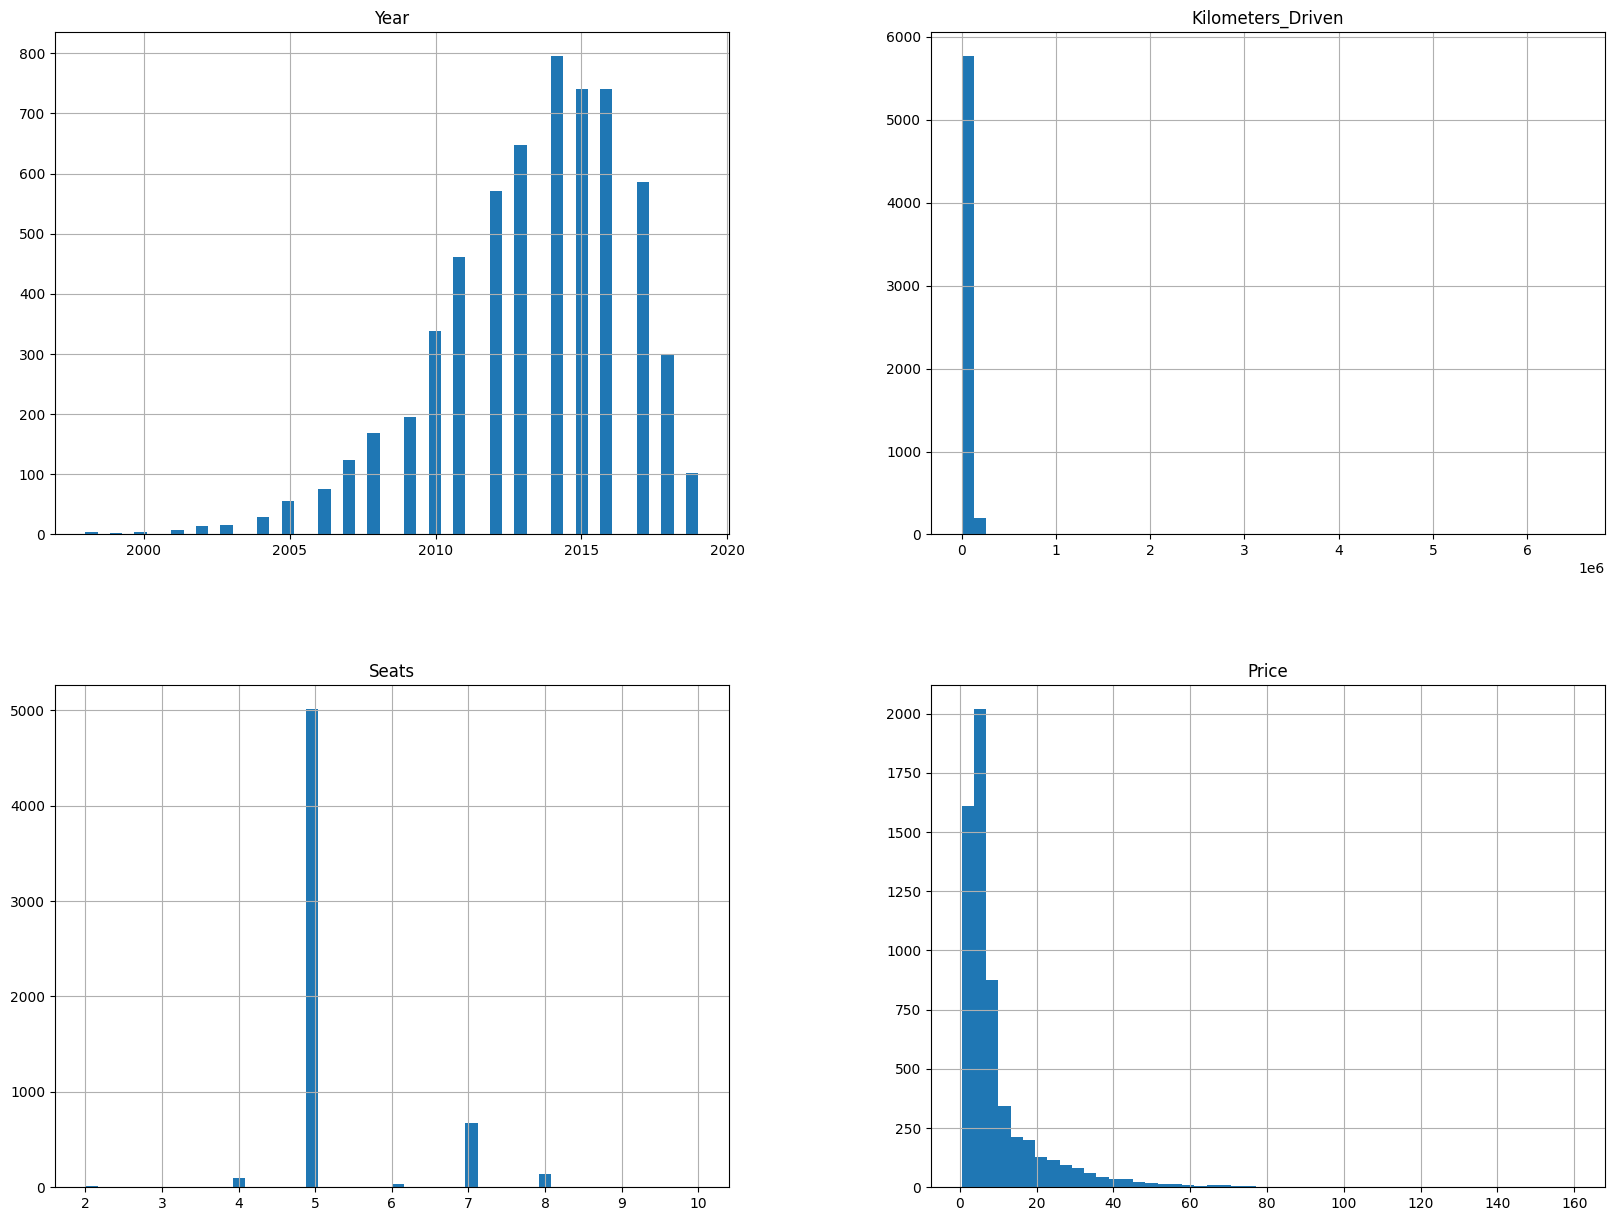

In [32]:
df.hist(bins = 50 , figsize=(20,15))

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5974 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5974 non-null   object 
 1   Location           5974 non-null   object 
 2   Year               5974 non-null   int64  
 3   Kilometers_Driven  5974 non-null   int64  
 4   Fuel_Type          5974 non-null   object 
 5   Transmission       5974 non-null   object 
 6   Owner_Type         5974 non-null   object 
 7   Mileage            5974 non-null   object 
 8   Engine             5974 non-null   object 
 9   Power              5974 non-null   object 
 10  Seats              5974 non-null   float64
 11  Price              5974 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 606.7+ KB


In [34]:
df['Mileage'] = df['Mileage'].str.replace(' kmpl','')
df['Mileage'] = df['Mileage'].str.replace(' km/kg','')
df['Engine'] = df['Engine'].str.replace(' CC','')
df['Power'] = df['Power'].str.replace('null bhp','125')
df['Power'] = df['Power'].str.replace(' bhp','')

dtf['Mileage'] = dtf['Mileage'].str.replace(' kmpl','')
dtf['Mileage'] = dtf['Mileage'].str.replace(' km/kg','')
dtf['Engine'] = dtf['Engine'].str.replace(' CC','')
dtf['Power'] = dtf['Power'].str.replace('null bhp','125')
dtf['Power'] = dtf['Power'].str.replace(' bhp','')

In [35]:
dtf.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto,Delhi,2014,40929,CNG,Manual,First,32.26,998,58.2,4.0
1,Maruti Alto,Coimbatore,2013,54493,Petrol,Manual,Second,24.7,796,47.3,5.0
2,Toyota Innova,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393,147.8,7.0
3,Toyota Etios,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364,125,5.0
4,Hyundai i20,Mumbai,2014,29000,Petrol,Manual,First,18.5,1197,82.85,5.0


In [36]:
dft = dtf.dropna()

In [37]:
dft.shape

(1223, 11)

In [38]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [39]:
df['Mileage'] = df['Mileage'].astype(float)
df['Engine'] = df['Engine'].astype(float)
df['Power'] = df['Power'].astype(float)


dtf['Mileage'] = dtf['Mileage'].astype(float)
dtf['Engine'] = dtf['Engine'].astype(float)
dtf['Power'] = dtf['Power'].astype(float)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5974 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5974 non-null   object 
 1   Location           5974 non-null   object 
 2   Year               5974 non-null   int64  
 3   Kilometers_Driven  5974 non-null   int64  
 4   Fuel_Type          5974 non-null   object 
 5   Transmission       5974 non-null   object 
 6   Owner_Type         5974 non-null   object 
 7   Mileage            5974 non-null   float64
 8   Engine             5974 non-null   float64
 9   Power              5974 non-null   float64
 10  Seats              5974 non-null   float64
 11  Price              5974 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 606.7+ KB


In [41]:
df1 =df.copy()

In [42]:
df1 = df1.replace("First" , 1)
df1 = df1.replace("Second" , 2)
df1 = df1.replace("Third", 3)
df1 = df1.replace("Fourth & Above" , 4)


In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5974 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5974 non-null   object 
 1   Location           5974 non-null   object 
 2   Year               5974 non-null   int64  
 3   Kilometers_Driven  5974 non-null   int64  
 4   Fuel_Type          5974 non-null   object 
 5   Transmission       5974 non-null   object 
 6   Owner_Type         5974 non-null   int64  
 7   Mileage            5974 non-null   float64
 8   Engine             5974 non-null   float64
 9   Power              5974 non-null   float64
 10  Seats              5974 non-null   float64
 11  Price              5974 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 606.7+ KB


In [44]:
df1["Fuel_Type"].value_counts()

Fuel_Type
Diesel    3195
Petrol    2713
CNG         56
LPG         10
Name: count, dtype: int64

In [45]:
df1 = df1.replace("Manual" , 1)
df1 = df1.replace("Automatic" , 2)

In [46]:
df1 = df1.replace("Diesel" ,1)
df1 = df1.replace("Petrol", 2)
df1 = df1.replace("CNG", 3)
df1 = df1.replace("LPG" , 4)

In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5974 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5974 non-null   object 
 1   Location           5974 non-null   object 
 2   Year               5974 non-null   int64  
 3   Kilometers_Driven  5974 non-null   int64  
 4   Fuel_Type          5974 non-null   int64  
 5   Transmission       5974 non-null   int64  
 6   Owner_Type         5974 non-null   int64  
 7   Mileage            5974 non-null   float64
 8   Engine             5974 non-null   float64
 9   Power              5974 non-null   float64
 10  Seats              5974 non-null   float64
 11  Price              5974 non-null   float64
dtypes: float64(5), int64(5), object(2)
memory usage: 606.7+ KB


array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Kilometers_Driven'}>,
        <Axes: title={'center': 'Fuel_Type'}>],
       [<Axes: title={'center': 'Transmission'}>,
        <Axes: title={'center': 'Owner_Type'}>,
        <Axes: title={'center': 'Mileage'}>],
       [<Axes: title={'center': 'Engine'}>,
        <Axes: title={'center': 'Power'}>,
        <Axes: title={'center': 'Seats'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >, <Axes: >]],
      dtype=object)

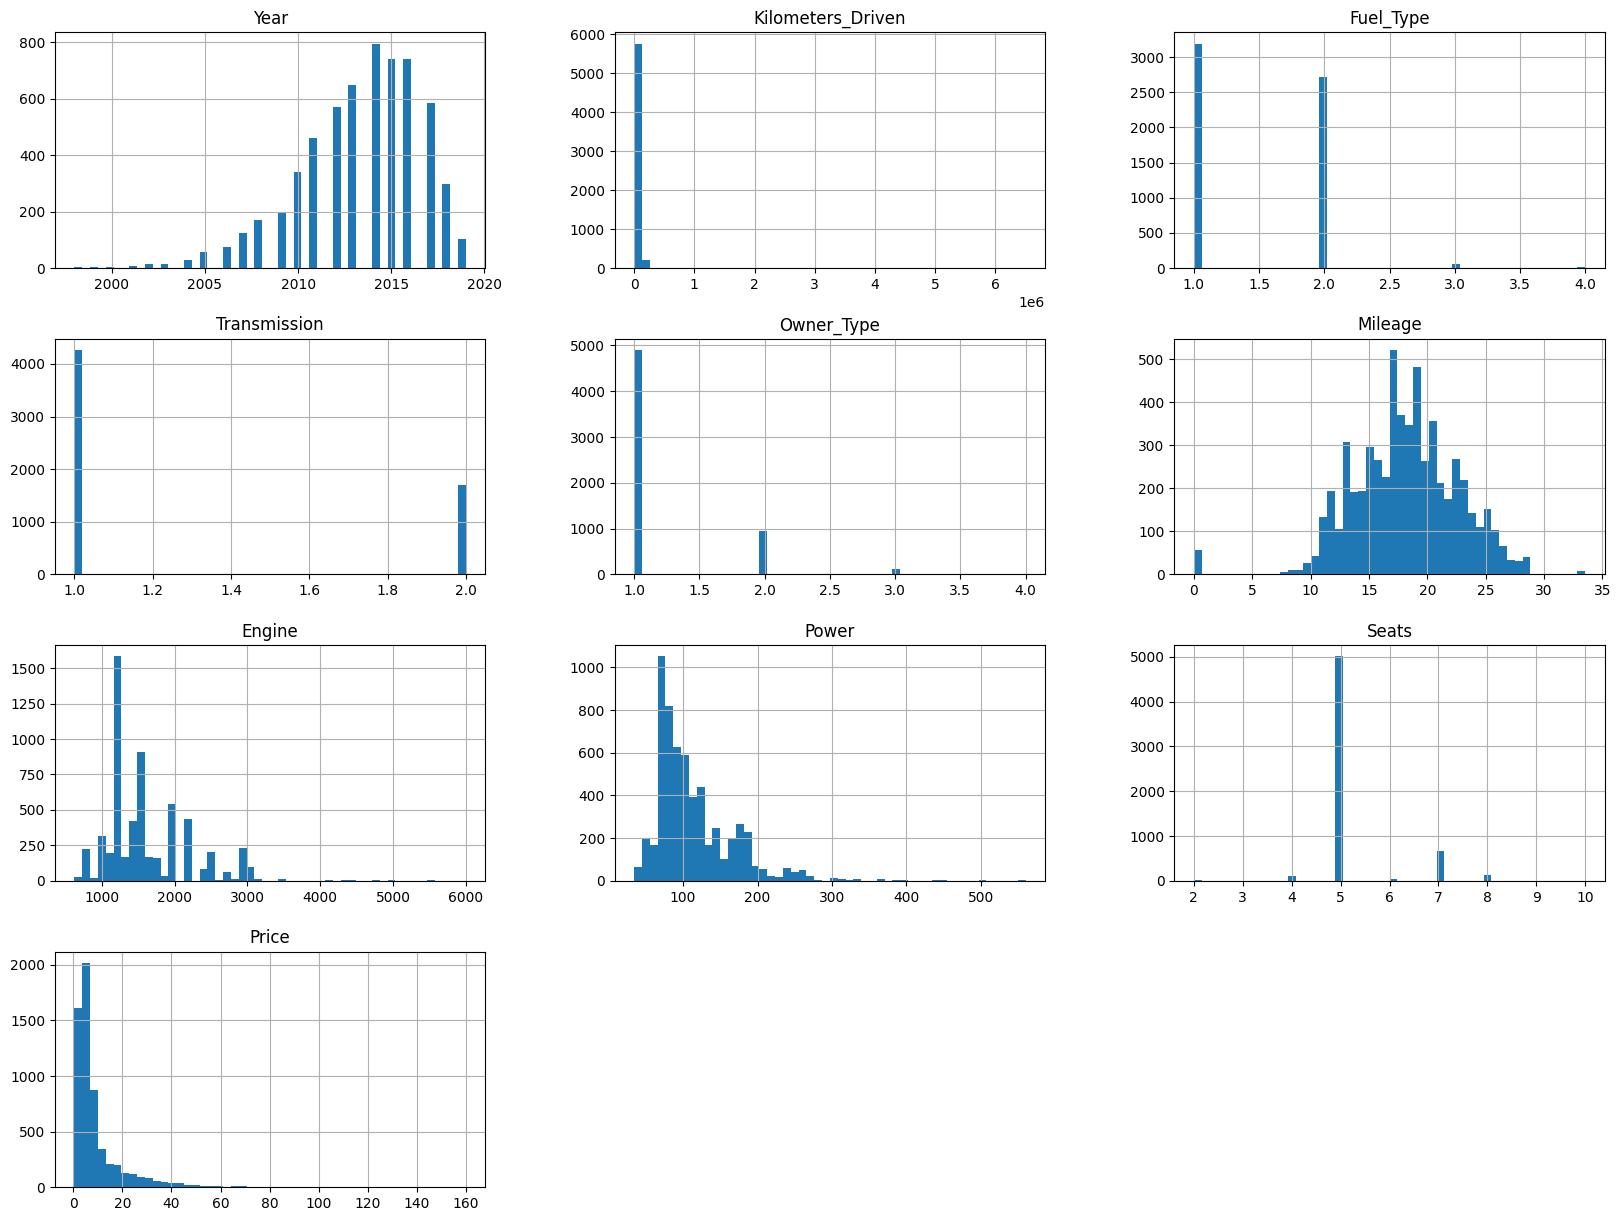

In [48]:
df1.hist(bins = 50 , figsize=(20,15))

In [49]:
df1.describe()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,5974.00000,5.974000e+03,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000
mean,2013.38701,5.866321e+04,1.477904,1.285906,1.200703,18.180693,1621.342986,113.477054,5.279712,9.500224
std,3.24746,9.156216e+04,0.527589,0.451882,0.453488,4.521087,600.741506,53.441432,0.806138,11.206134
min,1998.00000,1.710000e+02,1.000000,1.000000,1.000000,0.000000,624.000000,34.200000,2.000000,0.440000
25%,2012.00000,3.390450e+04,1.000000,1.000000,1.000000,15.215000,1198.000000,77.000000,5.000000,3.500000
50%,2014.00000,5.300000e+04,1.000000,1.000000,1.000000,18.160000,1493.000000,98.600000,5.000000,5.650000
75%,2016.00000,7.300000e+04,2.000000,2.000000,1.000000,21.100000,1984.000000,138.100000,5.000000,9.950000
max,2019.00000,6.500000e+06,4.000000,2.000000,4.000000,33.540000,5998.000000,560.000000,10.000000,160.000000


In [50]:
df_ruf = df1.drop(["Name" , "Location"], axis=1)

In [51]:
df_ruf.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2010,72000,3,1,1,26.60,998.0,58.16,5.0,1.75
1,2015,41000,1,1,1,19.67,1582.0,126.20,5.0,12.50
2,2011,46000,2,1,1,18.20,1199.0,88.70,5.0,4.50
3,2012,87000,1,1,1,20.77,1248.0,88.76,7.0,6.00
4,2013,40670,1,2,2,15.20,1968.0,140.80,5.0,17.74


In [52]:
cor_matx = df_ruf.corr()

In [53]:
cor_matx

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
Year,1.000000,-0.172622,-0.116372,0.095946,-0.394144,0.314376,-0.052382,0.008011,0.011915,0.305874
Kilometers_Driven,-0.172622,1.000000,-0.099913,-0.026068,0.084856,-0.064803,0.090570,0.034225,0.084196,-0.011356
Fuel_Type,-0.116372,-0.099913,1.000000,-0.146249,0.041980,-0.072748,-0.427060,-0.295296,-0.299396,-0.315620
Transmission,0.095946,-0.026068,-0.146249,1.000000,-0.008824,-0.342209,0.500755,0.639633,-0.073879,0.586025
Owner_Type,-0.394144,0.084856,0.041980,-0.008824,1.000000,-0.161533,0.052117,0.027813,0.013567,-0.097004
Mileage,0.314376,-0.064803,-0.072748,-0.342209,-0.161533,1.000000,-0.598382,-0.520282,-0.311268,-0.313752
Engine,-0.052382,0.090570,-0.427060,0.500755,0.052117,-0.598382,1.000000,0.858231,0.397948,0.659195
Power,0.008011,0.034225,-0.295296,0.639633,0.027813,-0.520282,0.858231,1.000000,0.099345,0.766871
Seats,0.011915,0.084196,-0.299396,-0.073879,0.013567,-0.311268,0.397948,0.099345,1.000000,0.053283
Price,0.305874,-0.011356,-0.315620,0.586025,-0.097004,-0.313752,0.659195,0.766871,0.053283,1.000000


In [54]:
from pandas.plotting import scatter_matrix

In [55]:
attributs  = ['Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Seats','Price']

array([[<Axes: xlabel='Year', ylabel='Year'>,
        <Axes: xlabel='Kilometers_Driven', ylabel='Year'>,
        <Axes: xlabel='Fuel_Type', ylabel='Year'>,
        <Axes: xlabel='Transmission', ylabel='Year'>,
        <Axes: xlabel='Owner_Type', ylabel='Year'>,
        <Axes: xlabel='Mileage', ylabel='Year'>,
        <Axes: xlabel='Engine', ylabel='Year'>,
        <Axes: xlabel='Power', ylabel='Year'>,
        <Axes: xlabel='Seats', ylabel='Year'>,
        <Axes: xlabel='Price', ylabel='Year'>],
       [<Axes: xlabel='Year', ylabel='Kilometers_Driven'>,
        <Axes: xlabel='Kilometers_Driven', ylabel='Kilometers_Driven'>,
        <Axes: xlabel='Fuel_Type', ylabel='Kilometers_Driven'>,
        <Axes: xlabel='Transmission', ylabel='Kilometers_Driven'>,
        <Axes: xlabel='Owner_Type', ylabel='Kilometers_Driven'>,
        <Axes: xlabel='Mileage', ylabel='Kilometers_Driven'>,
        <Axes: xlabel='Engine', ylabel='Kilometers_Driven'>,
        <Axes: xlabel='Power', ylabel='Kilometers

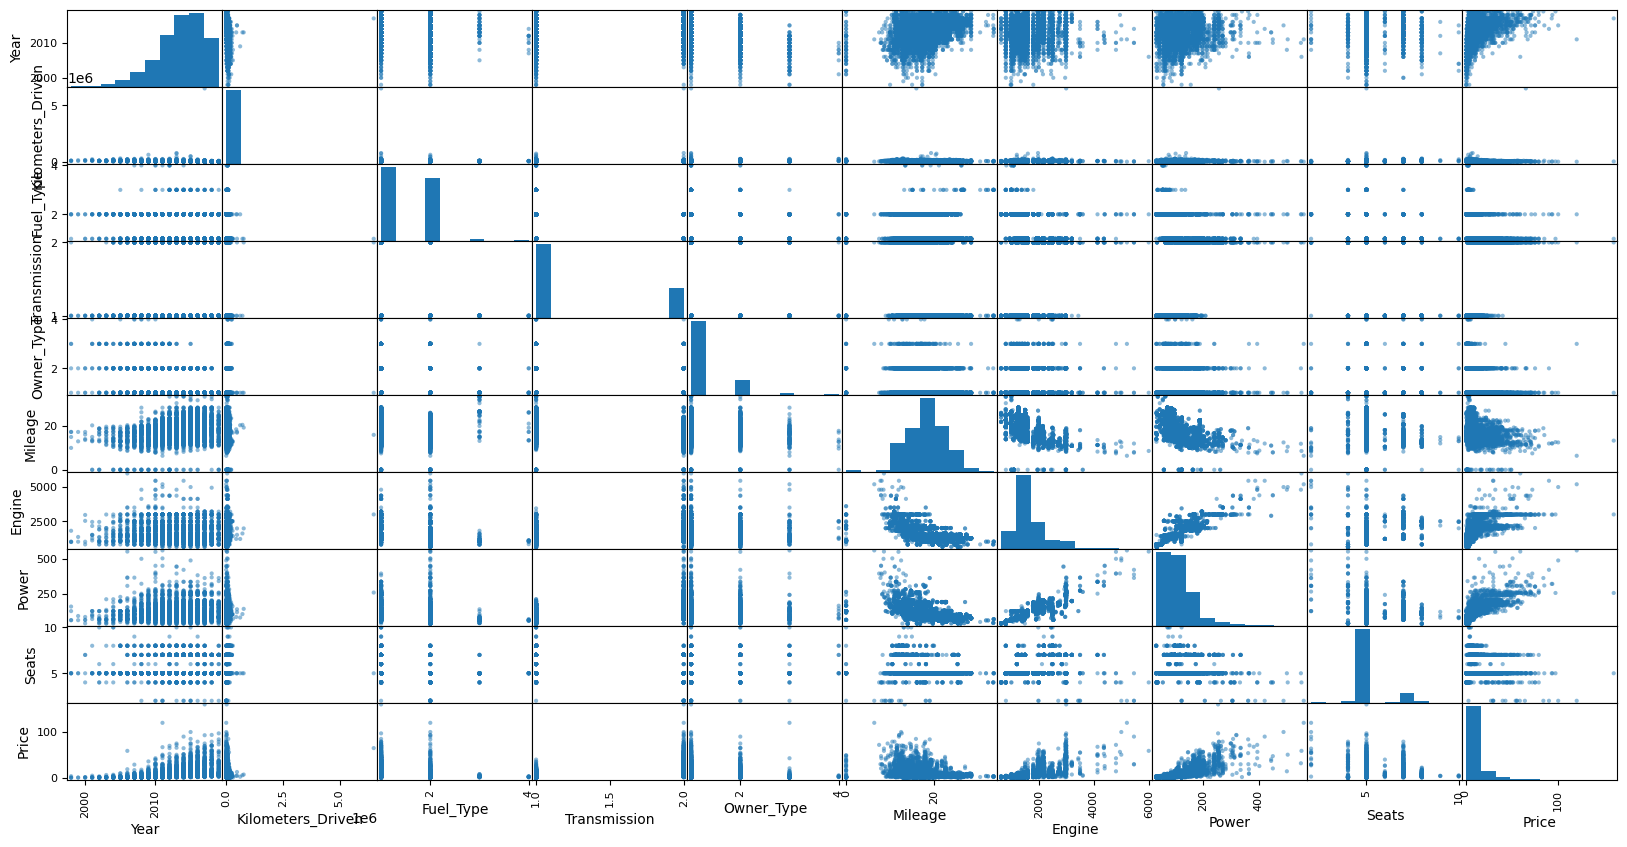

In [56]:
scatter_matrix(df1[attributs] ,figsize=(20,10))

df1.plot(kind = 'scatter', x= 'Price', y ='Year')

<Axes: xlabel='Price', ylabel='Mileage'>

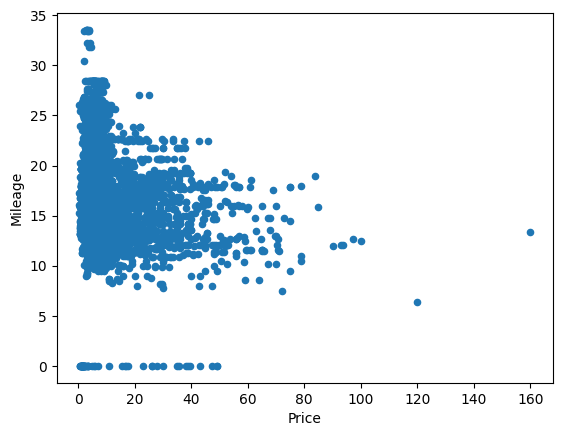

In [57]:
df1.plot(kind = 'scatter', x= 'Price', y ='Mileage')

<Axes: xlabel='Price', ylabel='Engine'>

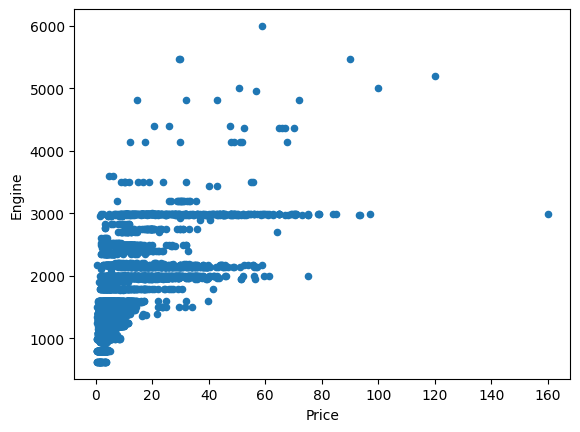

In [58]:
df1.plot(kind = 'scatter', x= 'Price', y ='Engine')

<Axes: xlabel='Price', ylabel='Power'>

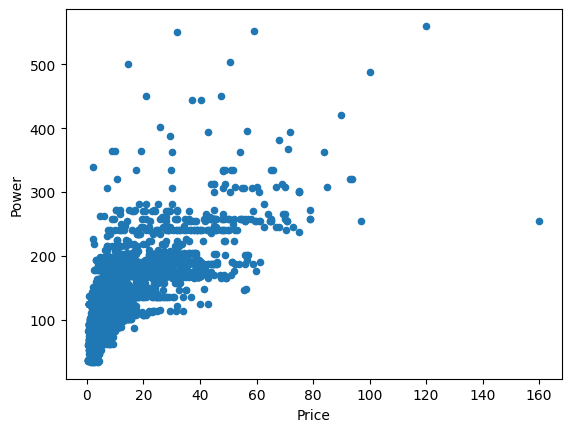

In [59]:
df1.plot(kind = 'scatter', x= 'Price', y ='Power')

<Axes: xlabel='Mileage', ylabel='Engine'>

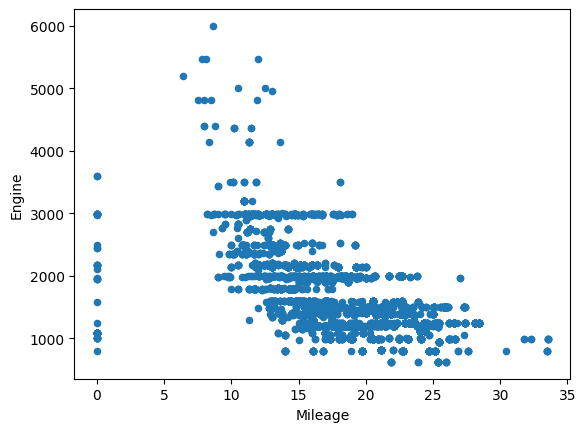

In [60]:
df1.plot(kind = 'scatter', x= 'Mileage', y ='Engine')

<Axes: xlabel='Engine', ylabel='Power'>

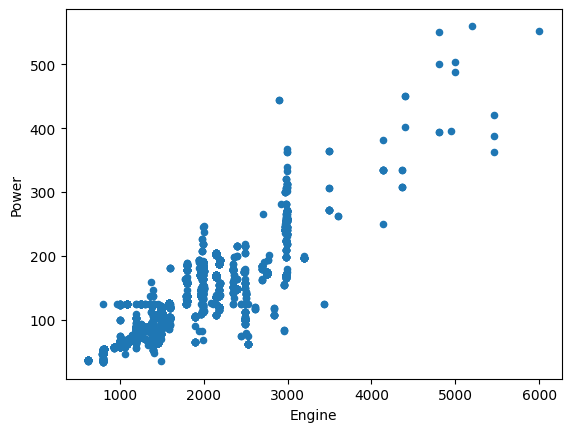

In [61]:
df1.plot(kind = 'scatter', x= 'Engine', y ='Power')

<Axes: xlabel='Power', ylabel='Mileage'>

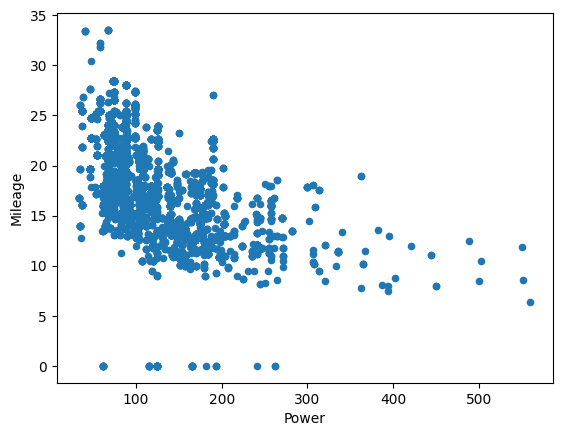

In [62]:
df1.plot(kind = 'scatter', x= 'Power', y ='Mileage')


<Axes: xlabel='Price', ylabel='Price'>

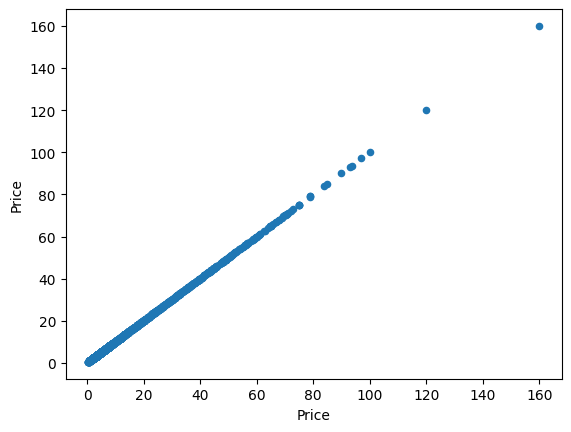

In [63]:
df1.plot(kind = 'scatter', x= 'Price', y ='Price')

Removing Outliers from Daatasets 

In [64]:
print("Highest value" , df1['Price'].mean()+3*df1['Price'].std())

Highest value 43.11862715248581


In [65]:
df1["Price"].describe()

count    5974.000000
mean        9.500224
std        11.206134
min         0.440000
25%         3.500000
50%         5.650000
75%         9.950000
max       160.000000
Name: Price, dtype: float64

In [66]:
print("Highest value" , df1['Price'].mean()-1*df1['Price'].std())

Highest value -1.7059099770645147


In [67]:
 df4= df1[(df1["Price"]>100.0)|(df1["Price"]<0.00)]

In [68]:
df4.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4079,Land Rover,Hyderabad,2017,25000,1,2,1,13.33,2993.0,255.0,5.0,160.0
5781,Lamborghini Gallardo,Delhi,2011,6500,2,2,3,6.40,5204.0,560.0,2.0,120.0


In [69]:
df2 =df1[(df['Mileage']<5)]

In [70]:
df2.shape

(56, 12)

In [71]:
df3 = df1.drop(df2.index)

In [72]:
df3['Mileage'].describe()

count    5918.000000
mean       18.352731
std         4.180405
min         6.400000
25%        15.300000
50%        18.200000
75%        21.100000
max        33.540000
Name: Mileage, dtype: float64

In [73]:
df1['Mileage'].describe()

count    5974.000000
mean       18.180693
std         4.521087
min         0.000000
25%        15.215000
50%        18.160000
75%        21.100000
max        33.540000
Name: Mileage, dtype: float64

In [74]:
df3 = df3.drop(df4.index)

In [75]:
df4.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4079,Land Rover,Hyderabad,2017,25000,1,2,1,13.33,2993.0,255.0,5.0,160.0
5781,Lamborghini Gallardo,Delhi,2011,6500,2,2,3,6.40,5204.0,560.0,2.0,120.0


In [76]:
df3.shape

(5916, 12)

In [77]:
# scatter_matrix(df3[attributs] ,figsize=(20,10))

<Axes: xlabel='Power', ylabel='Mileage'>

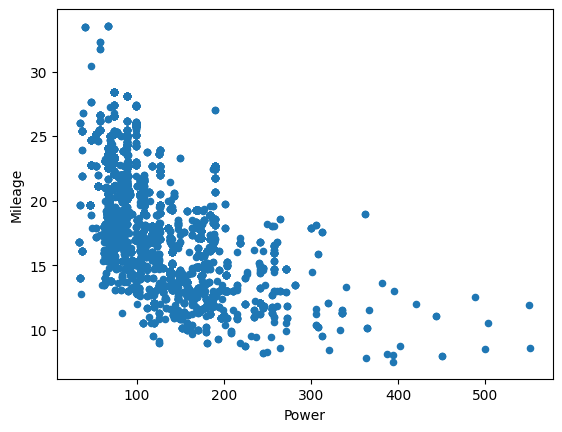

In [78]:
df3.plot(kind = 'scatter', x= 'Power', y ='Mileage')

In [79]:
df3.describe()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,5916.000000,5.916000e+03,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000
mean,2013.424442,5.853260e+04,1.477011,1.284483,1.197938,18.355600,1619.161765,113.188453,5.281778,9.433147
std,3.208169,9.187841e+04,0.527818,0.451206,0.449140,4.177711,596.164698,53.151686,0.804181,10.892674
min,1998.000000,1.710000e+02,1.000000,1.000000,1.000000,7.500000,624.000000,34.200000,2.000000,0.440000
25%,2012.000000,3.388950e+04,1.000000,1.000000,1.000000,15.300000,1198.000000,76.800000,5.000000,3.500000
50%,2014.000000,5.300000e+04,1.000000,1.000000,1.000000,18.200000,1493.000000,98.600000,5.000000,5.650000
75%,2016.000000,7.268325e+04,2.000000,2.000000,1.000000,21.100000,1971.250000,138.100000,5.000000,9.900000
max,2019.000000,6.500000e+06,4.000000,2.000000,4.000000,33.540000,5998.000000,552.000000,10.000000,100.000000


In [80]:
df2 = df3.copy()

In [81]:
df2.describe()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,5916.000000,5.916000e+03,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000,5916.000000
mean,2013.424442,5.853260e+04,1.477011,1.284483,1.197938,18.355600,1619.161765,113.188453,5.281778,9.433147
std,3.208169,9.187841e+04,0.527818,0.451206,0.449140,4.177711,596.164698,53.151686,0.804181,10.892674
min,1998.000000,1.710000e+02,1.000000,1.000000,1.000000,7.500000,624.000000,34.200000,2.000000,0.440000
25%,2012.000000,3.388950e+04,1.000000,1.000000,1.000000,15.300000,1198.000000,76.800000,5.000000,3.500000
50%,2014.000000,5.300000e+04,1.000000,1.000000,1.000000,18.200000,1493.000000,98.600000,5.000000,5.650000
75%,2016.000000,7.268325e+04,2.000000,2.000000,1.000000,21.100000,1971.250000,138.100000,5.000000,9.900000
max,2019.000000,6.500000e+06,4.000000,2.000000,4.000000,33.540000,5998.000000,552.000000,10.000000,100.000000


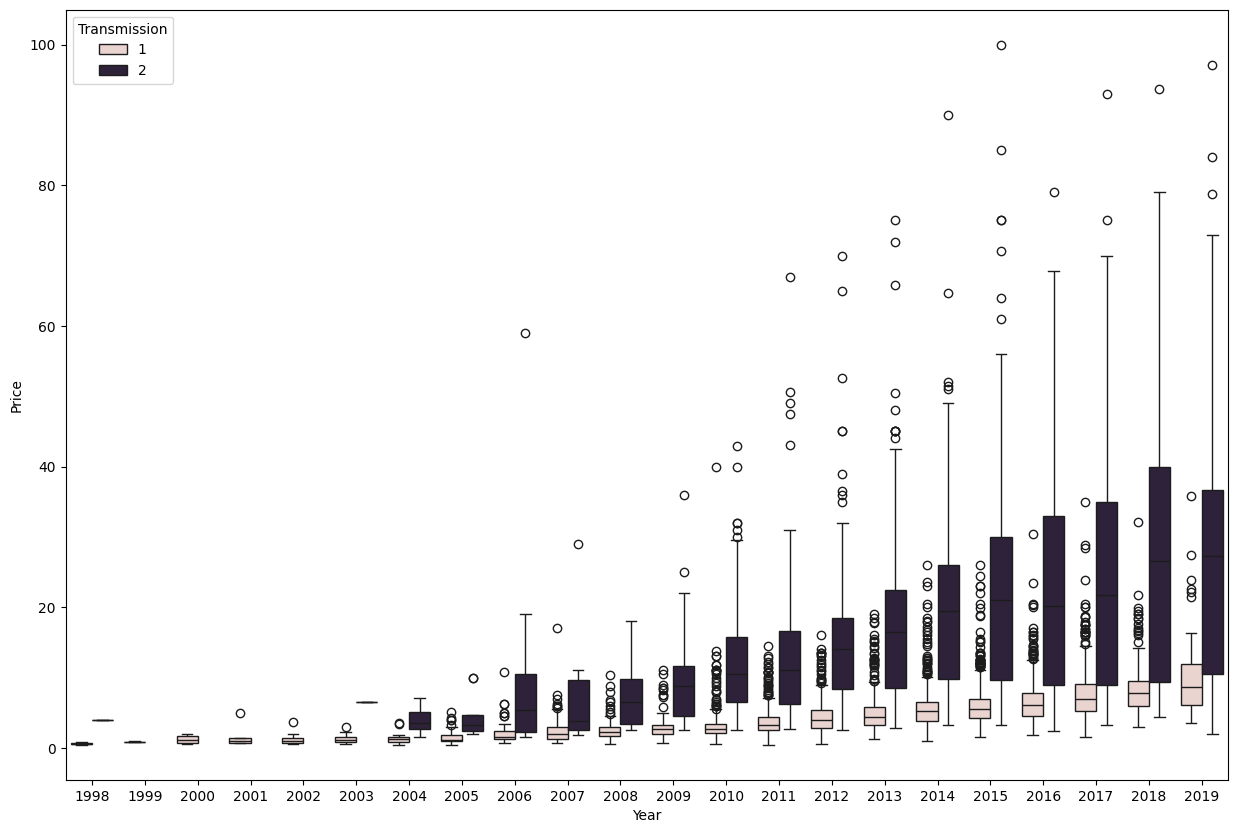

In [82]:
plt.figure(figsize=(15,10))
xl = "Year"
yl = "Price"
sns.boxplot(data = df3 , x= xl, y=yl , hue="Transmission")
plt.show()

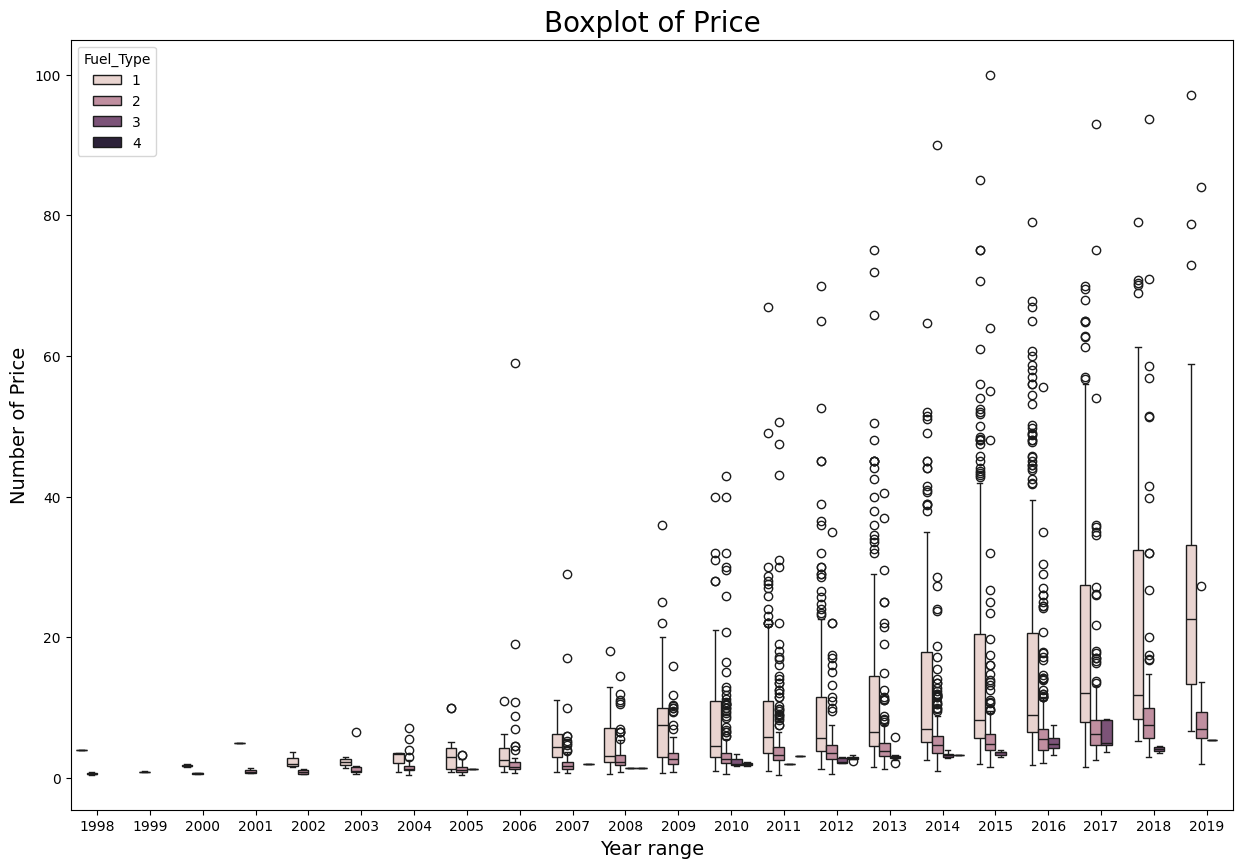

In [83]:
plt.figure(figsize=(15,10))
xl = "Year"
yl = "Price"
sns.boxplot(data = df3 , x= xl, y=yl , hue="Fuel_Type")
plt.xlabel('{} range'.format(xl), size=14)
plt.ylabel('Number of {}'.format(yl), size=14)
plt.title('Boxplot of {}'.format(yl), size=20)
plt.show()

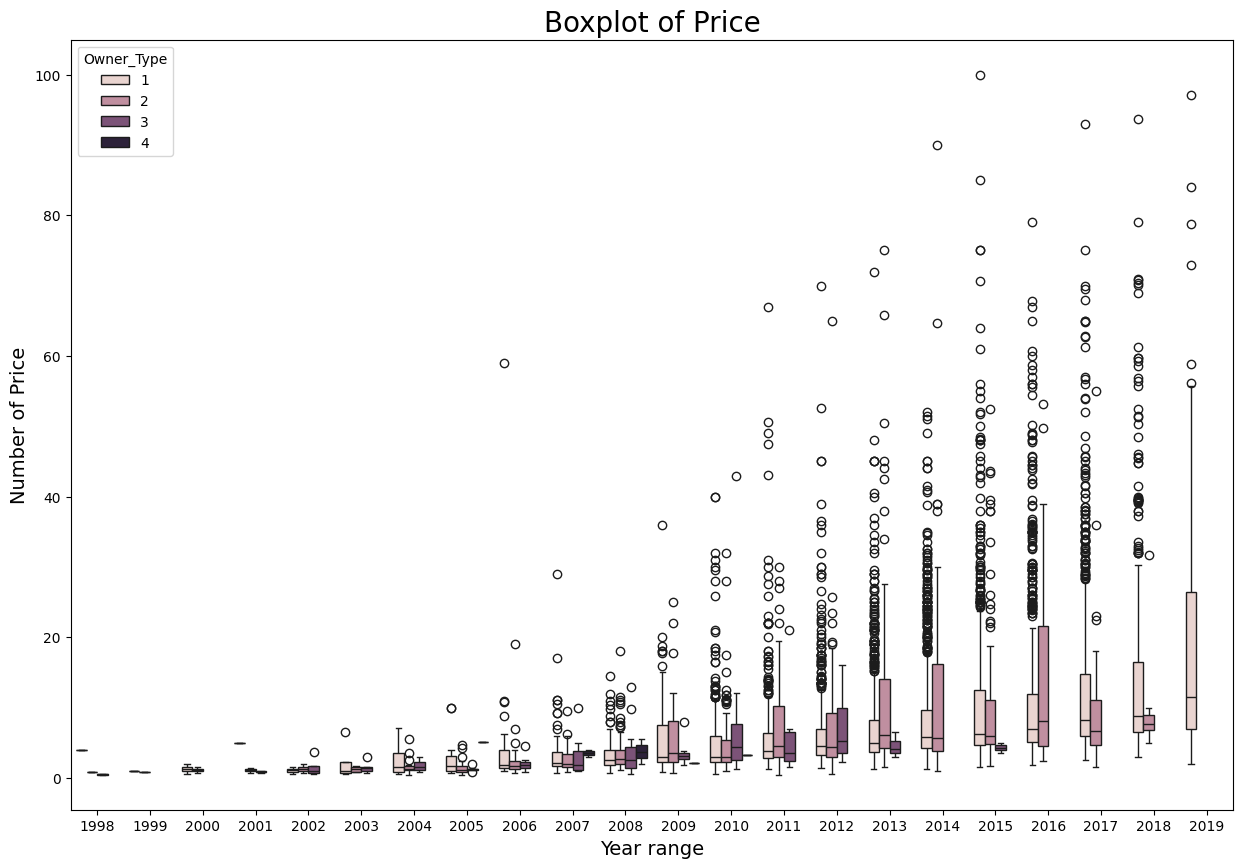

In [84]:
plt.figure(figsize=(15,10))
xl = "Year"
yl = "Price"
sns.boxplot(data = df3 , x= xl, y=yl , hue="Owner_Type")
plt.xlabel('{} range'.format(xl), size=14)
plt.ylabel('Number of {}'.format(yl), size=14)
plt.title('Boxplot of {}'.format(yl), size=20)
plt.show()

Lebel Encoding

In [85]:
df3 = df2.copy()
le_name = LabelEncoder()
df3["Name"]=le_name.fit_transform(df2["Name"])


In [86]:
df3.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,121,Mumbai,2010,72000,3,1,1,26.60,998.0,58.16,5.0,1.75
1,64,Pune,2015,41000,1,1,1,19.67,1582.0,126.20,5.0,12.50
2,59,Chennai,2011,46000,2,1,1,18.20,1199.0,88.70,5.0,4.50
3,109,Chennai,2012,87000,1,1,1,20.77,1248.0,88.76,7.0,6.00
4,2,Coimbatore,2013,40670,1,2,2,15.20,1968.0,140.80,5.0,17.74


In [87]:
le_name.inverse_transform([121,64,59])

array(['Maruti Wagon', 'Hyundai Creta', 'Honda Jazz'], dtype=object)

In [88]:
le_location = LabelEncoder()
df3["Location"] = le_location.fit_transform(df2["Location"])

In [89]:
df3.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,121,9,2010,72000,3,1,1,26.60,998.0,58.16,5.0,1.75
1,64,10,2015,41000,1,1,1,19.67,1582.0,126.20,5.0,12.50
2,59,2,2011,46000,2,1,1,18.20,1199.0,88.70,5.0,4.50
3,109,2,2012,87000,1,1,1,20.77,1248.0,88.76,7.0,6.00
4,2,3,2013,40670,1,2,2,15.20,1968.0,140.80,5.0,17.74


In [90]:
features = df3.drop("Price", axis=1)

In [91]:
label = df3["Price"]

In [92]:
x_train ,x_test , y_train ,y_test = train_test_split(features , label , test_size=0.3 , random_state=103)

In [93]:
x_train.shape , y_train.shape 

((4141, 11), (4141,))

In [94]:
x_test.shape , y_test.shape 

((1775, 11), (1775,))

# Phase:- 3 
Model Selection

In [95]:
regressors = [['DecisionTreeRegressor',DecisionTreeRegressor()],
              ['LinearSVR',LinearSVR()],
              ['SVR',SVR()],
              ['GradientBoostingRegressor',GradientBoostingRegressor()],
              ['HistGradientBoostingRegressor',HistGradientBoostingRegressor()],
              ['MLPRegressor',MLPRegressor()],
              ['AdaBoostRegressor',AdaBoostRegressor()],
              ['ExtraTreesRegressor',ExtraTreesRegressor()]]

In [96]:
Accuracy=[ ]
for modl in regressors:
    name = modl[0]
    model = modl[1]
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    
    RM = np.sqrt(mean_squared_error(y_test, y_pred))
    AT =  model.score(x_train,y_train)
    ATS = model.score(x_test,y_test)
    
    Accuracy.append(pd.Series({'model':name, 'Root Mean Squared  Error': RM,'Accuracy on Traing set':AT,'Accuracy on Testing set':ATS}) )

C:\Users\r_ran\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\r_ran\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [97]:
Accuracy

[model                       DecisionTreeRegressor
 Root Mean Squared  Error                 4.436704
 Accuracy on Traing set                   0.999999
 Accuracy on Testing set                  0.836022
 dtype: object,
 model                       LinearSVR
 Root Mean Squared  Error      7.69981
 Accuracy on Traing set      -0.009345
 Accuracy on Testing set      0.506115
 dtype: object,
 model                             SVR
 Root Mean Squared  Error    11.483723
 Accuracy on Traing set      -0.083819
 Accuracy on Testing set     -0.098578
 dtype: object,
 model                       GradientBoostingRegressor
 Root Mean Squared  Error                     3.328324
 Accuracy on Traing set                       0.944321
 Accuracy on Testing set                      0.907718
 dtype: object,
 model                       HistGradientBoostingRegressor
 Root Mean Squared  Error                         3.192533
 Accuracy on Traing set                            0.97372
 Accuracy on Testing se

In [98]:
model = HistGradientBoostingRegressor(max_iter=1000 , learning_rate=0.3)
model.fit(x_train , y_train)
y_pred = model.predict(x_test)

In [99]:
mse = mean_squared_error(y_pred , y_test)
trds = model.score(x_train,y_train)
tsds = model.score(x_test,y_test)
print(cross_val_score(model, x_train, y_train, cv=10))

[0.89866521 0.91876335 0.95115875 0.93498792 0.86552645 0.88688213
 0.94186983 0.94824951 0.95051663 0.90969928]


In [100]:
mse

10.216141291544924

In [101]:
trds

0.9998834917806084

In [102]:
tsds

0.9148955097493026

In [103]:
x_test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
136,103,2,2010,94385,2,1,2,19.70,796.0,46.30,5.0
177,77,1,2014,29000,1,1,1,22.54,1396.0,88.73,5.0
5664,121,0,2008,60123,2,1,2,18.90,998.0,67.10,5.0
3489,158,1,2013,19828,1,2,2,17.85,2967.0,300.00,4.0
2508,74,2,2008,120000,1,1,2,18.10,1493.0,110.00,5.0


In [104]:
y_test.head()

136      1.60
177      8.35
5664     1.95
3489    75.00
2508     2.00
Name: Price, dtype: float64

In [105]:
import pickle

In [106]:
price_predicution = "HistGradientBoostingRegressor.pkl"
with open(price_predicution, "wb")as f:
    pickle.dump(model,f)

In [107]:
name_le = "Name_LabelEncoder.pkl"
with open(name_le, "wb")as f:
    pickle.dump(le_name,f)

In [108]:
location_le = "Location_LabelEncoder.pkl"
with open(location_le , "wb")as f:
    pickle.dump(le_location,f)

In [109]:
df3.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,121,9,2010,72000,3,1,1,26.60,998.0,58.16,5.0,1.75
1,64,10,2015,41000,1,1,1,19.67,1582.0,126.20,5.0,12.50
2,59,2,2011,46000,2,1,1,18.20,1199.0,88.70,5.0,4.50
3,109,2,2012,87000,1,1,1,20.77,1248.0,88.76,7.0,6.00
4,2,3,2013,40670,1,2,2,15.20,1968.0,140.80,5.0,17.74


In [110]:
int_name = df3["Name"].unique()

In [111]:
int_name

array([121,  64,  59, 109,   2,  65, 150, 192, 202, 175, 106,  57, 118,
        85, 148,  52, 160, 134,  12, 115,   3,  77, 103,  62, 189,  93,
       120,  87, 133, 200, 178,  66,  75,  95,  69, 162,  76, 154, 122,
        46, 156,  98, 153,  55,  45, 187, 114,  13,  71, 191,  43,  74,
        31, 113, 190,  82, 108,  58, 205, 124,  92,  56, 139,  11,  23,
       170,   9, 136, 171,  18, 130, 143,  27, 164, 127, 104, 168,  89,
       167, 176,   6, 169,   5,  96, 142,  70,  16,  63,  73, 131, 102,
        35,  17,  42,   8, 198, 129, 105, 182,  51,  14, 177,  29, 141,
       152, 101,  54,  81, 186,   1, 128,  53, 204, 159,  26,  86,   7,
       144, 116, 172,  44, 132, 123, 117, 188,  60,  36,  10,  91,  84,
        49,  28,  90,  22,  99, 110, 181, 112,  83, 151, 140, 199, 107,
        25, 163, 194, 195, 111,  33, 147, 157, 125, 206, 179, 155,  97,
       174, 183,  15,  34, 184, 203,   0, 196,  37,  68,   4,  67,  40,
       201,  24,  38,  94,  19, 173, 149, 166,  72,  47,  88,  3

In [112]:
le_name.inverse_transform(int_name)

array(['Maruti Wagon', 'Hyundai Creta', 'Honda Jazz', 'Maruti Ertiga',
       'Audi A4', 'Hyundai EON', 'Nissan Micra', 'Toyota Innova',
       'Volkswagen Vento', 'Tata Indica', 'Maruti Ciaz', 'Honda City',
       'Maruti Swift', 'Land Rover', 'Mitsubishi Pajero', 'Honda Amaze',
       'Renault Duster', 'Mercedes-Benz New', 'BMW 3', 'Maruti S',
       'Audi A6', 'Hyundai i20', 'Maruti Alto', 'Honda WRV',
       'Toyota Corolla', 'Mahindra Ssangyong', 'Maruti Vitara',
       'Mahindra KUV', 'Mercedes-Benz M-Class', 'Volkswagen Polo',
       'Tata Nano', 'Hyundai Elantra', 'Hyundai Xcent', 'Mahindra Thar',
       'Hyundai Grand', 'Renault KWID', 'Hyundai i10', 'Nissan X-Trail',
       'Maruti Zen', 'Ford Figo', 'Porsche Cayenne', 'Mahindra XUV500',
       'Nissan Terrano', 'Honda Brio', 'Ford Fiesta', 'Tata Zest',
       'Maruti Ritz', 'BMW 5', 'Hyundai Santro', 'Toyota Fortuner',
       'Ford Ecosport', 'Hyundai Verna', 'Datsun GO', 'Maruti Omni',
       'Toyota Etios', 'Jaguar XF', 'M

In [113]:
int_location= df3["Location"].unique()

In [114]:
le_location.inverse_transform(int_location)

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [115]:
le_name.transform(["Maruti Wagon"])

array([121])

In [121]:
df2.head(35)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon,Mumbai,2010,72000,3,1,1,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta,Pune,2015,41000,1,1,1,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz,Chennai,2011,46000,2,1,1,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga,Chennai,2012,87000,1,1,1,20.77,1248.0,88.76,7.0,6.00
4,Audi A4,Coimbatore,2013,40670,1,2,2,15.20,1968.0,140.80,5.0,17.74
5,Hyundai EON,Hyderabad,2012,75000,4,1,1,21.10,814.0,55.20,5.0,2.35
6,Nissan Micra,Jaipur,2013,86999,1,1,1,23.08,1461.0,63.10,5.0,3.50
7,Toyota Innova,Mumbai,2016,36000,1,2,1,11.36,2755.0,171.50,8.0,17.50
8,Volkswagen Vento,Pune,2013,64430,1,1,1,20.54,1598.0,103.60,5.0,5.20
9,Tata Indica,Chennai,2012,65932,1,1,2,22.30,1248.0,74.00,5.0,1.95
